In [1]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]           1,450
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,456
      BatchNorm2d-11           [-1, 16, 10, 10]              32
             ReLU-12           [-1, 16, 10, 10]               0
          Dropout-13           [-1, 16, 10, 10]               0
           Conv2d-14             [-1, 1

Batch Size torch.Size([128, 1, 28, 28])


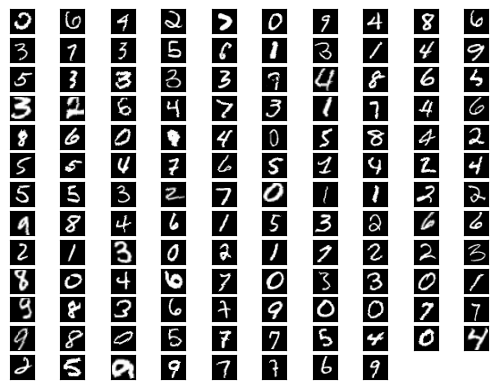

In [2]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [3]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 1


Train: Loss=0.0770 Batch_id=468 Accuracy=86.77: 100%|██████████| 469/469 [00:39<00:00, 11.74it/s]

[90.20766503461084, 91.78285375259567, 85.28029540114133, 85.23894960039145, 86.73399520712086, 78.47260653016048, 89.84454207502534, 88.60335195530726, 85.45547769612031, 84.58564464615903]


Test set: Average loss: 0.0557, Accuracy: 9829/10000 (98.29%)

[99.48979591836735, 99.38325991189427, 96.70542635658916, 98.91089108910892, 98.57433808553971, 97.98206278026906, 98.32985386221294, 99.22178988326849, 96.09856262833677, 98.01783944499505]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 2


Train: Loss=0.0684 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [00:40<00:00, 11.62it/s]

[98.22724970454162, 98.38326905962622, 96.3578382007385, 96.62371554395695, 96.8675111263266, 96.03394207710755, 98.09057113889827, 96.45650438946528, 96.15450350367458, 95.57908892250798]


Test set: Average loss: 0.0469, Accuracy: 9843/10000 (98.43%)

[99.6938775510204, 99.82378854625551, 98.35271317829456, 99.3069306930693, 100.0, 97.86995515695067, 97.80793319415449, 98.54085603112841, 96.09856262833677, 96.53121902874133]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 3


Train: Loss=0.0322 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:40<00:00, 11.66it/s]

[98.49738308289719, 98.70958172649065, 97.1299093655589, 97.12934268471702, 97.29544676480657, 97.23298284449363, 98.107468739439, 97.39824421388667, 96.76978294308665, 96.4531854093125]


Test set: Average loss: 0.0395, Accuracy: 9874/10000 (98.74%)

[99.59183673469387, 99.82378854625551, 98.44961240310077, 99.5049504950495, 99.18533604887983, 98.54260089686099, 98.01670146137788, 98.63813229571986, 97.5359342915811, 97.9187314172448]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 4


Train: Loss=0.0463 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:40<00:00, 11.65it/s]

[98.83504980584163, 98.73924651438742, 97.41524001342732, 97.37400097863318, 97.63779527559055, 97.19608928242022, 98.2595471443055, 97.49401436552274, 96.99196718509656, 96.55404269625147]


Test set: Average loss: 0.0282, Accuracy: 9915/10000 (99.15%)

[99.59183673469387, 99.47136563876651, 98.93410852713178, 98.91089108910892, 99.59266802443992, 98.76681614349776, 99.68684759916493, 99.12451361867704, 98.76796714579056, 98.61248761149653]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 5


Train: Loss=0.1450 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:40<00:00, 11.69it/s]

[98.8856998142833, 98.81340848412934, 97.91876468613629, 97.73283314304355, 97.86032180760014, 97.50968456004428, 98.61439675566069, 97.95690343176376, 97.53888224235173, 96.92385274836107]


Test set: Average loss: 0.0294, Accuracy: 9902/10000 (99.02%)

[99.48979591836735, 99.73568281938327, 98.44961240310077, 99.3069306930693, 99.89816700610999, 98.65470852017937, 98.8517745302714, 98.83268482490273, 98.56262833675564, 98.31516352824579]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 6


Train: Loss=0.0834 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:40<00:00, 11.60it/s]

[98.7337497889583, 98.97656481756155, 97.71735481705271, 97.84700701353776, 97.86032180760014, 97.5834716841911, 98.61439675566069, 97.73343974461292, 97.67561100666553, 97.31047234829383]


Test set: Average loss: 0.0244, Accuracy: 9918/10000 (99.18%)

[99.6938775510204, 99.82378854625551, 99.51550387596899, 99.20792079207921, 97.86150712830958, 99.10313901345292, 98.64300626304802, 99.41634241245137, 99.28131416837782, 99.10802775024777]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 7


Train: Loss=0.0193 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:39<00:00, 11.73it/s]

[99.07141651190275, 98.91723524176803, 98.15374286673381, 98.10797586038167, 98.06573091407053, 97.91551374285187, 98.63129435620141, 98.08459696727854, 97.96615963083234, 97.37771053958649]


Test set: Average loss: 0.0205, Accuracy: 9934/10000 (99.34%)

[99.6938775510204, 99.73568281938327, 99.6124031007752, 98.8118811881188, 99.4908350305499, 99.2152466367713, 99.26931106471815, 99.22178988326849, 99.38398357289527, 98.90981169474728]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 8


Train: Loss=0.0203 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:40<00:00, 11.64it/s]

[99.07141651190275, 98.97656481756155, 97.95233299765022, 97.94487033110423, 98.13420061622732, 98.02619442907212, 98.61439675566069, 98.08459696727854, 97.76106648436165, 97.36090099176332]


Test set: Average loss: 0.0268, Accuracy: 9912/10000 (99.12%)

[99.79591836734694, 99.91189427312776, 98.15891472868216, 99.4059405940594, 99.28716904276986, 98.87892376681614, 98.43423799582463, 99.12451361867704, 99.07597535934292, 99.00891972249752]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 9


Train: Loss=0.0149 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:39<00:00, 11.82it/s]

[99.17271652878608, 99.00622960545832, 98.05303793219201, 98.20583917794814, 98.21978774392332, 98.08153477218225, 98.74957755998648, 98.26017557861132, 97.55597333789096, 97.2768532526475]


Test set: Average loss: 0.0222, Accuracy: 9928/10000 (99.28%)

[99.79591836734694, 99.82378854625551, 99.12790697674419, 99.3069306930693, 99.89816700610999, 98.87892376681614, 99.16492693110646, 99.22178988326849, 98.97330595482546, 98.51337958374629]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 10


Train: Loss=0.0265 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:39<00:00, 11.81it/s]

[99.17271652878608, 99.110056363097, 98.27123195703255, 98.28739194258685, 98.15131804176652, 98.06308799114555, 98.8340655626901, 98.37190742218675, 98.00034182191078, 97.69709194822659]


Test set: Average loss: 0.0294, Accuracy: 9914/10000 (99.14%)

[99.79591836734694, 100.0, 99.03100775193798, 99.5049504950495, 99.18533604887983, 98.76681614349776, 98.12108559498957, 99.41634241245137, 98.15195071868584, 99.20713577799802]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 11


Train: Loss=0.0116 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:40<00:00, 11.72it/s]

[99.2571332095222, 98.99139721150993, 98.17052702249077, 98.28739194258685, 98.3396097226977, 98.08153477218225, 98.73267995944576, 98.32402234636871, 97.98325072637157, 97.4617582787023]


Test set: Average loss: 0.0205, Accuracy: 9933/10000 (99.33%)

[99.48979591836735, 99.91189427312776, 99.2248062015504, 99.20792079207921, 99.79633401221996, 99.43946188340807, 98.95615866388309, 99.22178988326849, 99.28131416837782, 98.71159563924678]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 12


Train: Loss=0.1211 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:39<00:00, 11.73it/s]

[99.17271652878608, 99.06555918125186, 98.22087948976167, 98.3037024955146, 98.39096199931531, 98.33978970669618, 98.95234876647517, 98.29209896249003, 98.03452401298924, 97.76433013951925]


Test set: Average loss: 0.0228, Accuracy: 9922/10000 (99.22%)

[99.79591836734694, 99.64757709251101, 98.64341085271317, 99.20792079207921, 99.59266802443992, 99.43946188340807, 98.8517745302714, 99.31906614785993, 99.07597535934292, 98.61248761149653]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 13


Train: Loss=0.0165 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:39<00:00, 11.82it/s]

[99.34154989025832, 99.24354790863245, 98.30480026854649, 98.49942913064753, 98.16843546730571, 98.43202361187973, 98.90165596485299, 98.57940941739824, 98.27379935053837, 97.86518742645823]


Test set: Average loss: 0.0196, Accuracy: 9929/10000 (99.29%)

[99.79591836734694, 99.73568281938327, 99.2248062015504, 99.5049504950495, 99.38900203665987, 98.87892376681614, 98.8517745302714, 99.22178988326849, 99.17864476386036, 99.00891972249752]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 14


Train: Loss=0.0212 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:39<00:00, 11.76it/s]

[99.30778321796387, 99.15455354494216, 98.15374286673381, 98.4504974718643, 98.4080794248545, 98.33978970669618, 98.86786076377155, 98.45171588188349, 98.27379935053837, 97.98285426122038]


Test set: Average loss: 0.0201, Accuracy: 9934/10000 (99.34%)

[99.28571428571429, 99.82378854625551, 99.32170542635659, 99.4059405940594, 99.79633401221996, 99.10313901345292, 99.06054279749478, 99.70817120622569, 99.38398357289527, 98.41427155599604]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 15


Train: Loss=0.0415 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:39<00:00, 11.79it/s]


[99.18959986493331, 99.15455354494216, 98.22087948976167, 98.41787636600881, 98.39096199931531, 98.24755580151263, 98.85096316323082, 98.45171588188349, 98.23961715945993, 97.88199697428139]
Test set: Average loss: 0.0213, Accuracy: 9931/10000 (99.31%)

[99.6938775510204, 99.82378854625551, 99.12790697674419, 99.60396039603961, 99.08350305498982, 98.54260089686099, 99.37369519832986, 99.41634241245137, 98.97330595482546, 99.30624380574827]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 16


Train: Loss=0.0273 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:39<00:00, 11.85it/s]

[99.20648320108053, 99.30287748442599, 98.50621013763008, 98.79301908334692, 98.59637110578568, 98.8009592326139, 99.03683676917878, 98.67517956903433, 98.39343701931294, 98.23499747856783]


Test set: Average loss: 0.0171, Accuracy: 9946/10000 (99.46%)

[99.6938775510204, 99.91189427312776, 99.4186046511628, 99.4059405940594, 99.59266802443992, 98.99103139013454, 99.16492693110646, 99.61089494163424, 99.38398357289527, 99.30624380574827]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 17


Train: Loss=0.0633 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:39<00:00, 11.80it/s]

[99.49349991558331, 99.45120142390982, 98.65726753944276, 98.87457184798565, 98.64772338240329, 98.67183176535694, 99.25650557620817, 98.85075818036711, 98.37634592377371, 98.18456883509835]


Test set: Average loss: 0.0165, Accuracy: 9942/10000 (99.42%)

[99.6938775510204, 99.82378854625551, 99.32170542635659, 99.3069306930693, 99.69450101832994, 99.10313901345292, 98.95615866388309, 99.5136186770428, 99.28131416837782, 99.40535183349851]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 18


Train: Loss=0.0392 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:39<00:00, 11.76it/s]

[99.45973324328887, 99.40670424206466, 98.77475662974152, 98.92350350676888, 98.61348853132489, 98.89319313779745, 99.01993916863805, 98.83479648842778, 98.70107673901897, 98.30223566986048]


Test set: Average loss: 0.0174, Accuracy: 9948/10000 (99.48%)

[99.6938775510204, 100.0, 99.2248062015504, 99.5049504950495, 99.79633401221996, 98.99103139013454, 99.26931106471815, 99.61089494163424, 99.17864476386036, 99.40535183349851]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 19


Train: Loss=0.0056 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:39<00:00, 11.82it/s]

[99.39219989869999, 99.36220706021952, 98.82510909701242, 98.82564018920242, 98.78466278671688, 98.74561888950379, 99.15511997296383, 98.80287310454908, 98.56434797470519, 98.25180702639099]


Test set: Average loss: 0.0172, Accuracy: 9945/10000 (99.45%)

[99.6938775510204, 100.0, 99.12790697674419, 99.4059405940594, 99.79633401221996, 98.99103139013454, 99.16492693110646, 99.61089494163424, 99.17864476386036, 99.40535183349851]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 20


Train: Loss=0.0220 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:39<00:00, 11.76it/s]


[99.4090832348472, 99.34737466627114, 98.65726753944276, 98.72777687163595, 98.69907565902089, 98.8009592326139, 99.13822237242312, 98.85075818036711, 98.47889249700906, 98.41990250462263]
Test set: Average loss: 0.0171, Accuracy: 9942/10000 (99.42%)

[99.6938775510204, 100.0, 99.32170542635659, 99.5049504950495, 99.28716904276986, 98.99103139013454, 99.06054279749478, 99.5136186770428, 99.28131416837782, 99.40535183349851]
Adjusting learning rate of group 0 to 2.0000e-03.


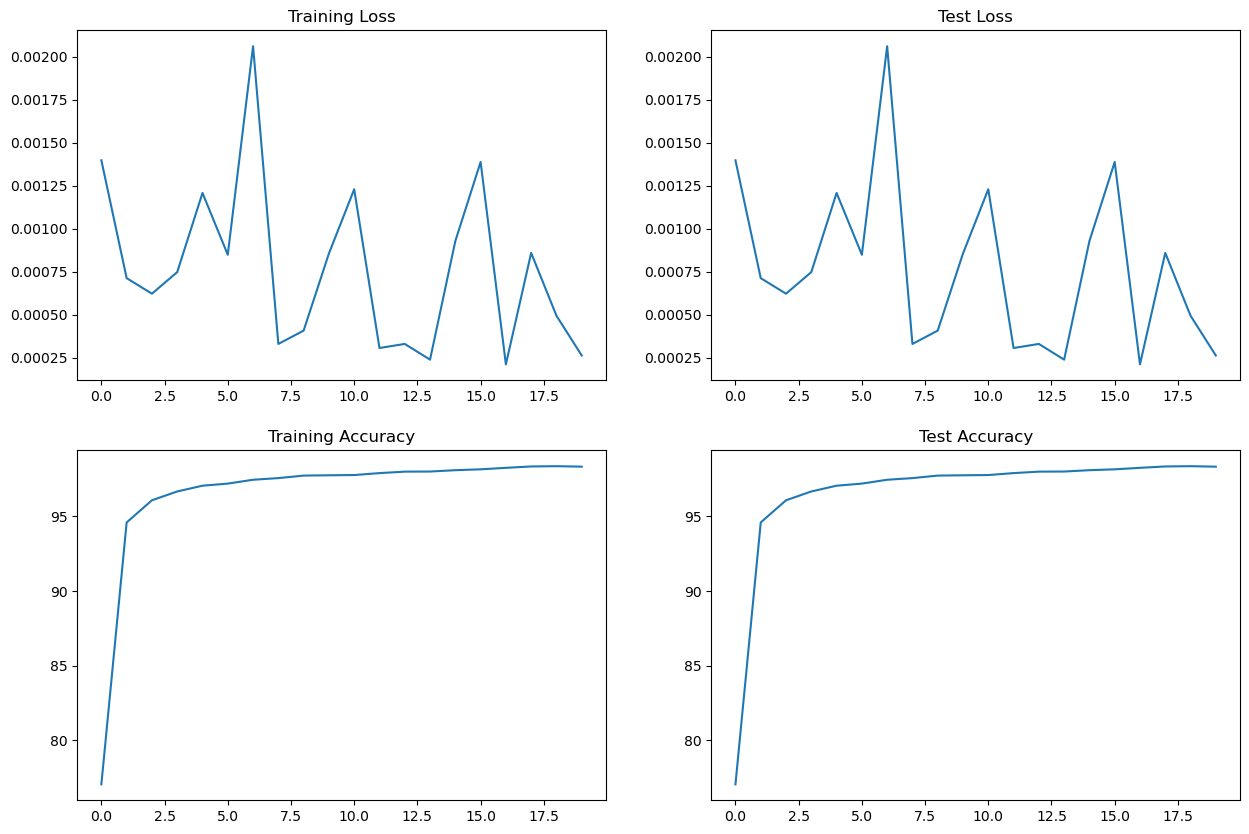

In [4]:
from utils import plot_results
plot_results(train_accuracy_per_epoch, train_loss_per_epoch, test_accuracy_per_epoch, test_loss_per_epoch)